In [17]:
#!/usr/bin/env python
# coding:utf8
# -*- coding: utf-8 -*-
"""
Main Program: PLOT MODIS AGGREGATION RESULT 

Created on 2019

@author: Jianyu Zheng
"""

'\nMain Program: PLOT MODIS AGGREGATION RESULT \n\nCreated on 2019\n\n@author: Jianyu Zheng\n'

In [18]:
import os 
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [19]:
filename1 = "MYD08_D3A200801_baseline_daily_v9_5.h5"            #"MOD08_M3A200801_test04.h5"
filename2 = "/umbc/xfs1/zzbatmos/common/Data/MODIS/6/MYD08_D3/MYD08_D3.A2008001.006.2015088011904.hdf" #"MYD08_D3.A2008001.006.2015088011904.hdf"

In [20]:
hdf = Dataset(filename1,'r')
cld_fraction1 = np.array(hdf.variables["cloud_fraction_Mean"][:])
scale_factor  = hdf.variables["cloud_fraction_Mean"].scale_factor
fillvalue     = hdf.variables["cloud_fraction_Mean"]._FillValue
offset        = hdf.variables["cloud_fraction_Mean"].add_offset
cld_fraction1[np.where(cld_fraction1 == fillvalue)] = np.nan
cld_fraction1 = (cld_fraction1 - offset) / scale_factor 
cld_fraction1 = (cld_fraction1 - offset) * scale_factor 

temp1 = np.array(hdf.variables["cloud_top_temperature_Mean"][:])
scale_factor  = hdf.variables["cloud_top_temperature_Mean"].scale_factor
fillvalue     = hdf.variables["cloud_top_temperature_Mean"]._FillValue
offset        = hdf.variables["cloud_top_temperature_Mean"].add_offset
temp1[np.where(temp1 == fillvalue)] = np.nan
temp1 = (temp1 - offset) / scale_factor 
temp1 = (temp1 - offset) * scale_factor 

emis1 = np.array(hdf.variables["cloud_emissivity_Mean"][:])
scale_factor  = hdf.variables["cloud_emissivity_Mean"].scale_factor
fillvalue     = hdf.variables["cloud_emissivity_Mean"]._FillValue
offset        = hdf.variables["cloud_emissivity_Mean"].add_offset
emis1[np.where(emis1 == fillvalue)] = np.nan
emis1 = (emis1 - offset) / scale_factor 
emis1 = (emis1 - offset) * scale_factor 

pres1 = np.array(hdf.variables["cloud_top_pressure_Mean"][:])
scale_factor  = hdf.variables["cloud_top_pressure_Mean"].scale_factor
fillvalue     = hdf.variables["cloud_top_pressure_Mean"]._FillValue
offset        = hdf.variables["cloud_top_pressure_Mean"].add_offset
pres1[np.where(pres1 == fillvalue)] = np.nan
pres1 = (pres1 - offset) / scale_factor 
pres1 = (pres1 - offset) * scale_factor 


In [21]:
hdf = Dataset(filename2,'r')
cld_fraction2 = np.array(np.flip(hdf.variables["Cloud_Fraction_Mean"][:],0))
scale_factor  = hdf.variables["Cloud_Fraction_Mean"].scale_factor
fillvalue     = hdf.variables["Cloud_Fraction_Mean"]._FillValue
offset        = hdf.variables["Cloud_Fraction_Mean"].add_offset
cld_fraction2[np.where(cld_fraction2 == fillvalue)] = np.nan
cld_fraction2 = (cld_fraction2 - offset) / scale_factor 
cld_fraction2 = (cld_fraction2 - offset) * scale_factor 

temp2 = np.array(np.flip(hdf.variables["Cloud_Top_Temperature_Mean"][:],0))
scale_factor  = hdf.variables["Cloud_Top_Temperature_Mean"].scale_factor
fillvalue     = hdf.variables["Cloud_Top_Temperature_Mean"]._FillValue
offset        = hdf.variables["Cloud_Top_Temperature_Mean"].add_offset
temp2[np.where(temp2 == fillvalue)] = np.nan
temp2 = (temp2 - offset) / scale_factor 
temp2 = (temp2 - offset) * scale_factor 

emis2 = np.array(np.flip(hdf.variables["Cloud_Effective_Emissivity_Mean"][:],0))
scale_factor  = hdf.variables["Cloud_Effective_Emissivity_Mean"].scale_factor
fillvalue     = hdf.variables["Cloud_Effective_Emissivity_Mean"]._FillValue
offset        = hdf.variables["Cloud_Effective_Emissivity_Mean"].add_offset
emis2[np.where(emis2 == fillvalue)] = np.nan
emis2 = (emis2 - offset) / scale_factor 
emis2 = (emis2 - offset) * scale_factor 

pres2 = np.array(np.flip(hdf.variables["Cloud_Top_Pressure_Mean"][:],0))
scale_factor  = hdf.variables["Cloud_Top_Pressure_Mean"].scale_factor
fillvalue     = hdf.variables["Cloud_Top_Pressure_Mean"]._FillValue
offset        = hdf.variables["Cloud_Top_Pressure_Mean"].add_offset
pres2[np.where(pres2 == fillvalue)] = np.nan
pres2 = (pres2 - offset) / scale_factor 
pres2 = (pres2 - offset) * scale_factor 


In [22]:
print(cld_fraction1.shape)
print(cld_fraction2.shape)

(180, 360)
(180, 360)


In [23]:
diff_cld  = cld_fraction1.round(4) - cld_fraction2.round(4)
diff_temp = temp1.round(4) - temp2.round(4)
diff_emis = emis1.round(4) - emis2.round(4)
diff_pres = pres1.round(4) - pres2.round(4)

In [24]:
ratio_cld=(diff_cld/cld_fraction2)
ratio_cld[np.where(ratio_cld >= 1.0)] =1.0
ratio_cld[np.where(ratio_cld <= -1.0)]=-1.0

ratio_pres=(diff_pres/pres2)
ratio_pres[np.where(ratio_pres >= 1.0)] =1.0
ratio_pres[np.where(ratio_pres <= -1.0)]=-1.0

ratio_temp=(diff_temp/temp2)
ratio_temp[np.where(ratio_temp >= 1.0)] =1.0
ratio_temp[np.where(ratio_temp <= -1.0)]=-1.0

ratio_emis=(diff_emis/emis2)
ratio_emis[np.where(ratio_emis >= 1.0)] =1.0
ratio_emis[np.where(ratio_emis <= -1.0)]=-1.0

/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less_equal
  This is separate from the ipykernel package so we can avoid doing imports until
/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater_equal
  
/umbc/xfs1/zzbatmos/com

In [25]:
lon = np.arange(-180,180,1)
lat = np.arange(-90,90,1)
Lon,Lat = np.meshgrid(lon,lat)
levels=50

/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


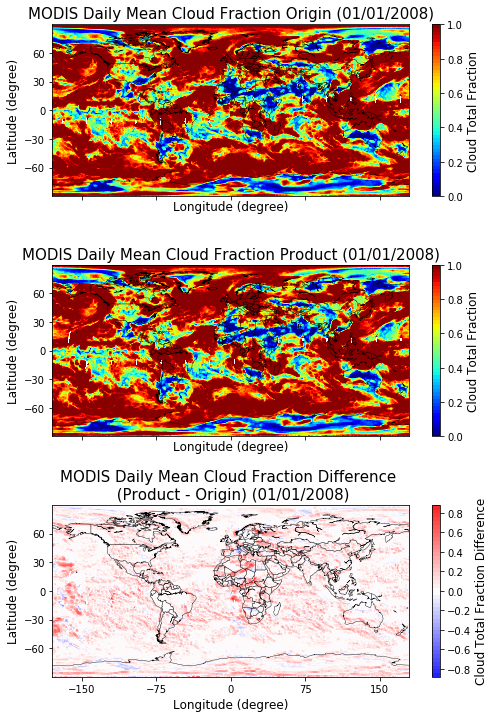

In [26]:
fig, axe = plt.subplots(3,1, figsize=(8,12),sharex=True,sharey=True) 
fig.subplots_adjust(wspace =0.0, hspace =0.4)
m = Basemap(projection='cyl',fix_aspect=False,lon_0=0,lat_0=0)

m.drawcountries(ax=axe[0])
m.drawcoastlines(linewidth=0.4,ax=axe[0])
cset1 = axe[0].contourf(Lon, Lat, cld_fraction2, levels, cmap='jet')#, vmin=-10, vmax=10)
axe[0].set_xticks([-150,-75,0,75,150])
axe[0].set_yticks([-60,-30,0,30,60])
axe[0].set_xlabel("Longitude (degree)",fontsize=12)
axe[0].set_ylabel("Latitude (degree)",fontsize=12)
axe[0].set_title('MODIS Daily Mean Cloud Fraction Origin (01/01/2008)',fontsize=15)
cg1 = fig.colorbar(cset1,ax=axe[0],extend='both')
cg1.set_ticks(np.linspace(-1.0,1.0,11))
cg1.set_label('Cloud Total Fraction',fontsize=12)

m.drawcountries(ax=axe[1])
m.drawcoastlines(linewidth=0.4,ax=axe[1])
cset2 = axe[1].contourf(Lon, Lat, cld_fraction1, levels, cmap='jet')#, vmin=-10, vmax=10)
axe[1].set_xticks([-150,-75,0,75,150])
axe[1].set_yticks([-60,-30,0,30,60])
axe[1].set_xlabel("Longitude (degree)",fontsize=12)
axe[1].set_ylabel("Latitude (degree)",fontsize=12)
axe[1].set_title('MODIS Daily Mean Cloud Fraction Product (01/01/2008)',fontsize=15)
cg2 = fig.colorbar(cset2,ax=axe[1],extend='both')
cg2.set_ticks(np.linspace(-1.0,1.0,11))
cg2.set_label('Cloud Total Fraction',fontsize=12)

m.drawcountries(ax=axe[2])
m.drawcoastlines(linewidth=0.4,ax=axe[2])
cset3 = axe[2].contourf(Lon, Lat, diff_cld, levels, cmap='bwr', vmin=-1.0, vmax=1.0)
axe[2].set_xticks([-150,-75,0,75,150])
axe[2].set_yticks([-60,-30,0,30,60])
axe[2].set_xlabel("Longitude (degree)",fontsize=12)
axe[2].set_ylabel("Latitude (degree)",fontsize=12)
axe[2].set_title('MODIS Daily Mean Cloud Fraction Difference \n (Product - Origin) (01/01/2008)',fontsize=15)
cg3 = fig.colorbar(cset3,ax=axe[2])
cg3.set_ticks(np.linspace(-1.0,1.0,11))
cg3.set_label('Cloud Total Fraction Difference',fontsize=12)
plt.savefig('MODIS_cldfra_daily_diff_abs.png',dpi=600)

/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


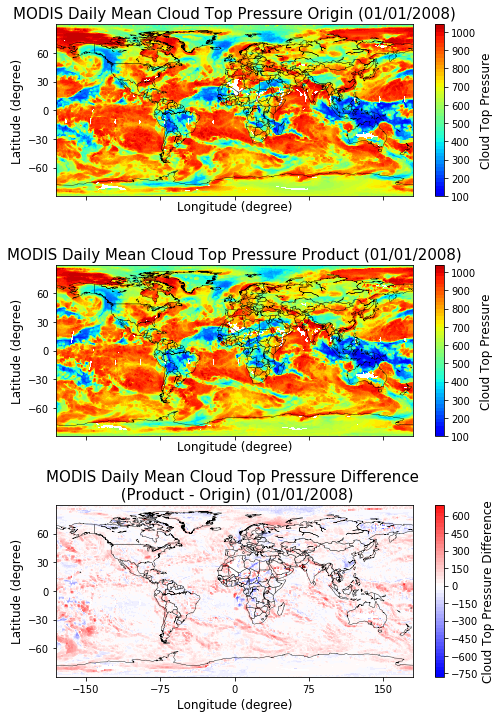

In [29]:
fig, axe = plt.subplots(3,1, figsize=(8,12),sharex=True,sharey=True) 
fig.subplots_adjust(wspace =0.0, hspace =0.4)
m = Basemap(projection='cyl',fix_aspect=False,lon_0=0,lat_0=0)

m.drawcountries(ax=axe[0])
m.drawcoastlines(linewidth=0.4,ax=axe[0])
cset1 = axe[0].contourf(Lon, Lat, pres2, levels, cmap='jet', vmin=0, vmax=1100)
axe[0].set_xticks([-150,-75,0,75,150])
axe[0].set_yticks([-60,-30,0,30,60])
axe[0].set_xlabel("Longitude (degree)",fontsize=12)
axe[0].set_ylabel("Latitude (degree)",fontsize=12)
axe[0].set_title('MODIS Daily Mean Cloud Top Pressure Origin (01/01/2008)',fontsize=15)
cg1 = fig.colorbar(cset1,ax=axe[0],extend='both')
cg1.set_ticks(np.linspace(100,1100,11))
cg1.set_label('Cloud Top Pressure',fontsize=12)

m.drawcountries(ax=axe[1])
m.drawcoastlines(linewidth=0.4,ax=axe[1])
cset2 = axe[1].contourf(Lon, Lat, pres1, levels, cmap='jet', vmin=0, vmax=1100)
axe[1].set_xticks([-150,-75,0,75,150])
axe[1].set_yticks([-60,-30,0,30,60])
axe[1].set_xlabel("Longitude (degree)",fontsize=12)
axe[1].set_ylabel("Latitude (degree)",fontsize=12)
axe[1].set_title('MODIS Daily Mean Cloud Top Pressure Product (01/01/2008)',fontsize=15)
cg2 = fig.colorbar(cset2,ax=axe[1],extend='both')
cg2.set_ticks(np.linspace(100,1100,11))
cg2.set_label('Cloud Top Pressure',fontsize=12)

m.drawcountries(ax=axe[2])
m.drawcoastlines(linewidth=0.4,ax=axe[2])
cset3 = axe[2].contourf(Lon, Lat, diff_pres, levels, cmap='bwr', vmin=-750, vmax=750)
axe[2].set_xticks([-150,-75,0,75,150])
axe[2].set_yticks([-60,-30,0,30,60])
axe[2].set_xlabel("Longitude (degree)",fontsize=12)
axe[2].set_ylabel("Latitude (degree)",fontsize=12)
axe[2].set_title('MODIS Daily Mean Cloud Top Pressure Difference \n (Product - Origin) (01/01/2008)',fontsize=15)
cg3 = fig.colorbar(cset3,ax=axe[2])
#cg3.set_ticks(np.linspace(-1.0,1.0,11))
cg3.set_label('Cloud Top Pressure Difference',fontsize=12)
plt.savefig('MODIS_cldpres_daily_diff_abs.png',dpi=600)

/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


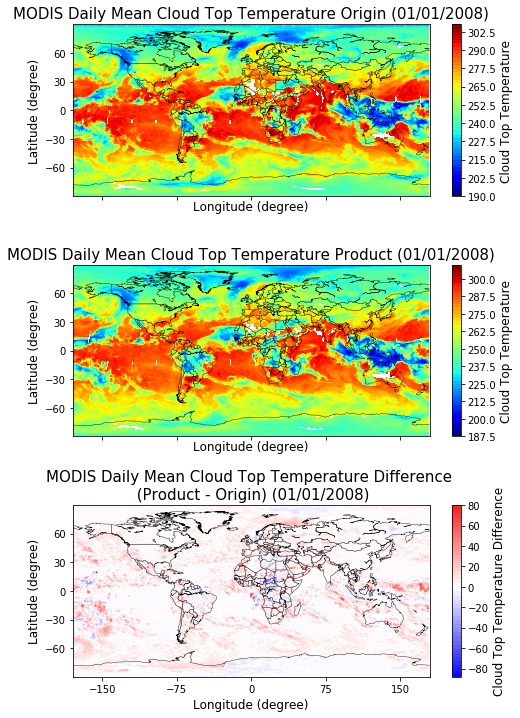

In [32]:
fig, axe = plt.subplots(3,1, figsize=(8,12),sharex=True,sharey=True) 
fig.subplots_adjust(wspace =0.0, hspace =0.4)
m = Basemap(projection='cyl',fix_aspect=False,lon_0=0,lat_0=0)

m.drawcountries(ax=axe[0])
m.drawcoastlines(linewidth=0.4,ax=axe[0])
cset1 = axe[0].contourf(Lon, Lat, temp2, levels, cmap='jet')#, vmin=-10, vmax=10)
axe[0].set_xticks([-150,-75,0,75,150])
axe[0].set_yticks([-60,-30,0,30,60])
axe[0].set_xlabel("Longitude (degree)",fontsize=12)
axe[0].set_ylabel("Latitude (degree)",fontsize=12)
axe[0].set_title('MODIS Daily Mean Cloud Top Temperature Origin (01/01/2008)',fontsize=15)
cg1 = fig.colorbar(cset1,ax=axe[0],extend='both')
#cg1.set_ticks(np.linspace(-1.0,1.0,11))
cg1.set_label('Cloud Top Temperature',fontsize=12)

m.drawcountries(ax=axe[1])
m.drawcoastlines(linewidth=0.4,ax=axe[1])
cset2 = axe[1].contourf(Lon, Lat, temp1, levels, cmap='jet')#, vmin=-10, vmax=10)
axe[1].set_xticks([-150,-75,0,75,150])
axe[1].set_yticks([-60,-30,0,30,60])
axe[1].set_xlabel("Longitude (degree)",fontsize=12)
axe[1].set_ylabel("Latitude (degree)",fontsize=12)
axe[1].set_title('MODIS Daily Mean Cloud Top Temperature Product (01/01/2008)',fontsize=15)
cg2 = fig.colorbar(cset2,ax=axe[1],extend='both')
#cg2.set_ticks(np.linspace(-1.0,1.0,11))
cg2.set_label('Cloud Top Temperature',fontsize=12)

m.drawcountries(ax=axe[2])
m.drawcoastlines(linewidth=0.4,ax=axe[2])
cset3 = axe[2].contourf(Lon, Lat, diff_temp, levels, cmap='bwr', vmin=-90, vmax=90)
axe[2].set_xticks([-150,-75,0,75,150])
axe[2].set_yticks([-60,-30,0,30,60])
axe[2].set_xlabel("Longitude (degree)",fontsize=12)
axe[2].set_ylabel("Latitude (degree)",fontsize=12)
axe[2].set_title('MODIS Daily Mean Cloud Top Temperature Difference \n (Product - Origin) (01/01/2008)',fontsize=15)
cg3 = fig.colorbar(cset3,ax=axe[2])
#cg3.set_ticks(np.linspace(-1.0,1.0,11))
cg3.set_label('Cloud Top Temperature Difference',fontsize=12)
plt.savefig('MODIS_cldtmp_daily_diff_abs.png',dpi=600)

/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/umbc/xfs1/zzbatmos/common/Softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


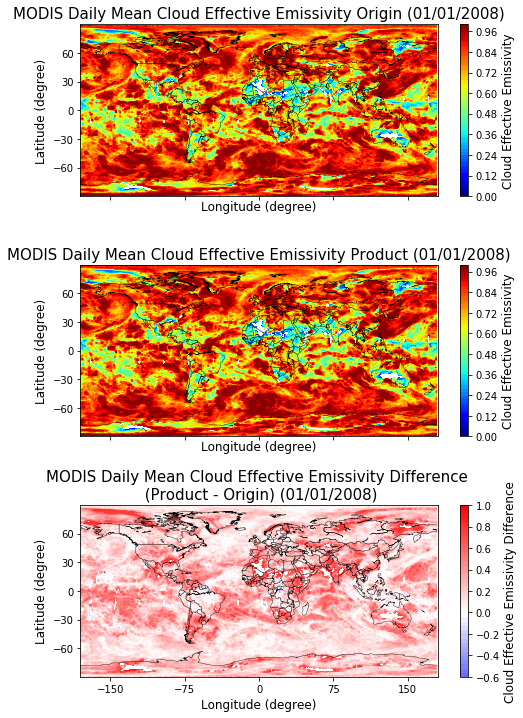

In [34]:
fig, axe = plt.subplots(3,1, figsize=(8,12),sharex=True,sharey=True) 
fig.subplots_adjust(wspace =0.0, hspace =0.4)
m = Basemap(projection='cyl',fix_aspect=False,lon_0=0,lat_0=0)

m.drawcountries(ax=axe[0])
m.drawcoastlines(linewidth=0.4,ax=axe[0])
cset1 = axe[0].contourf(Lon, Lat, emis2, levels, cmap='jet')#, vmin=-10, vmax=10)
axe[0].set_xticks([-150,-75,0,75,150])
axe[0].set_yticks([-60,-30,0,30,60])
axe[0].set_xlabel("Longitude (degree)",fontsize=12)
axe[0].set_ylabel("Latitude (degree)",fontsize=12)
axe[0].set_title('MODIS Daily Mean Cloud Effective Emissivity Origin (01/01/2008)',fontsize=15)
cg1 = fig.colorbar(cset1,ax=axe[0],extend='both')
#cg1.set_ticks(np.linspace(-1.0,1.0,11))
cg1.set_label('Cloud Effective Emissivity',fontsize=12)

m.drawcountries(ax=axe[1])
m.drawcoastlines(linewidth=0.4,ax=axe[1])
cset2 = axe[1].contourf(Lon, Lat, emis2, levels, cmap='jet')#, vmin=-10, vmax=10)
axe[1].set_xticks([-150,-75,0,75,150])
axe[1].set_yticks([-60,-30,0,30,60])
axe[1].set_xlabel("Longitude (degree)",fontsize=12)
axe[1].set_ylabel("Latitude (degree)",fontsize=12)
axe[1].set_title('MODIS Daily Mean Cloud Effective Emissivity Product (01/01/2008)',fontsize=15)
cg2 = fig.colorbar(cset2,ax=axe[1],extend='both')
#cg2.set_ticks(np.linspace(-1.0,1.0,11))
cg2.set_label('Cloud Effective Emissivity',fontsize=12)

m.drawcountries(ax=axe[2])
m.drawcoastlines(linewidth=0.4,ax=axe[2])
cset3 = axe[2].contourf(Lon, Lat, diff_emis, levels, cmap='bwr', vmin=-1.0, vmax=1.0)
axe[2].set_xticks([-150,-75,0,75,150])
axe[2].set_yticks([-60,-30,0,30,60])
axe[2].set_xlabel("Longitude (degree)",fontsize=12)
axe[2].set_ylabel("Latitude (degree)",fontsize=12)
axe[2].set_title('MODIS Daily Mean Cloud Effective Emissivity Difference \n (Product - Origin) (01/01/2008)',fontsize=15)
cg3 = fig.colorbar(cset3,ax=axe[2])
cg3.set_ticks(np.linspace(-1.0,1.0,11))
cg3.set_label('Cloud Effective Emissivity Difference',fontsize=12)
plt.savefig('MODIS_cldemis_daily_diff_abs.png',dpi=600)